# Generalized coordinates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from decimal import Decimal

In [2]:
from PlotFunctions import plot_signal, plot_position, plot_velocity, plot_variance, all_plots
%run PlotFunctions.py

#plot_signal(record_signal, record_each, n_iter, t_T, t_R, dt)
#plot_position(record_position, record_each, n_iter, t_T, t_R, dt)
#plot_velocity(record_velocity, record_each, n_iter, t_T, t_R, dt)
#plot_variance(record_variance, record_each, n_iter, t_T, t_R, dt)
#all_plots(record, bang_data, record_each, n_iter, t_T, t_R, dt, xT, v)

## Definition
For the linear models of the eye and arm, we consider a single-input single-output discrete-time system under control with the following state-update equation:
$$
\tilde{x}_{t+1} = A\tilde{x}_t+B\left (u_t+w_t \right)
$$  
where $\tilde{x}_t$ is the $n$-dimentional state at time $t$, $\tilde{x}_{t+1}$ is the $n$-dimentional state at time $t+dt$, $u_t$ the neural driving signal at time $t$, $w_t$ is a white noise with mean zero and variance $ku_t^2$, $A$ is a fixed $n \times n$ matrix and B is a $n \times 1$ vector both describing the dynamics of the system.

Here, A will be the following matrix:  

$$ A = 
\begin{bmatrix}
1 & dt & \frac{dt^2}{2} & \cdots & \frac{dt^n}{n!}\\
0 & 1 & dt & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \vdots\\
0 & 0 & 0 & 1 & dt \\
0 & \cdots & \cdots & \cdots & 1-\frac{dt}{\tau}
\end{bmatrix}
\textbf{ }\textbf{ }\textbf{ }\textbf{ }and\textbf{ }\textbf{ }\textbf{ }\textbf{ }
B = \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 0 \\ dt\end{bmatrix}
$$  
  
We choose this matrix since, according to the Taylor's formula:  
$ x\left (t+dt \right) = x\left (t \right) + dt\times \dot{x}\left (t \right) + \frac{dt^2}{2}\times \ddot{x}\left (t \right)+ \dots + \frac{dt^n}{n!}\times x^{(n)}\left (t \right) + \mathcal{o}\left(dt^n\right)
$
and  
$x^{(n)}\left (t+dt \right) = \left ( 1 - \frac{dt}{\tau} \right)x^{(n)}\left (t \right) + dt\left (u \left (t\right) + w\left (t\right) \right)
$

In [3]:
def fact(n): 
    """The factorial function
    Returns n!, that is n x (n-1) x (n-2) x ... x 1
    Recursive implementation
    """
    if n == 0:
        return 1
    else:
        return(n*fact(n-1))

In [4]:
tau = 0.013
dt = 0.001 # step time
n = 2 # number of coordinates
k = 0.01 # kind of accuracy parameter: the smaller k is, the more accurate is the pointing

In [5]:
# definition of A and B

A = np.zeros((n,n))
B = np.zeros(n)
for i in np.arange(n):
    for j in np.arange(i,n):
        A[i,j] = dt**(j-i)/fact(j-i)
A[n-1, n-1] = 1-dt/tau
B[n-1] = dt

In [6]:
target = np.array([1,5,10,15,20,25,30,35,40])
t_Tv = 0.03+0.002*5+0*target#0.02468+0.001739*target # see Transitioning from Saccade to SPEM using LQTC, Korentis & Enderle

In [7]:
t_Tv

array([ 0.04,  0.04,  0.04,  0.04,  0.04,  0.04,  0.04,  0.04,  0.04])

In [8]:
t_Tv = np.array([0.033,  0.042 ,  0.051,  0.059 ,  0.068,  0.077 , 0.086,  0.094 ])

In [9]:
t_T =  float(round(Decimal(t_Tv[0]),3)) #.05 # saccade duration
t_R =  .1-float(round(Decimal(t_Tv[0]),3)) # .05 # fixing / pursuit duration
T = int(np.round(t_T/dt))
R = int(np.round(t_R/dt))
time = np.linspace(0, t_T+t_R, R+T+1)
time_ms = time*1000
x0 = np.zeros(n) # starting point
xT = np.zeros(n) # ending point
xT[0] = 0.5
x0[0] = 0
x0[1] = 5
v = 10
#v = 10*np.cos(20*np.pi*time) # velocity of the target (deg/s)


In [10]:
def xT_f(t):
#    return np.array([40+10/np.pi*np.cos(2*np.pi*t*dt), -20*np.sin(2*np.pi*t*dt)])
    return np.array([target[0]+v*t*dt,v])

In [11]:
xx = np.zeros(T+R+1)
vv = np.zeros(T+R+1)
for i in np.arange(T+R+1):
    xx[i] = xT_f(i)[0]
    vv[i] = xT_f(i)[1]
print(xx)

[ 1.    1.01  1.02  1.03  1.04  1.05  1.06  1.07  1.08  1.09  1.1   1.11
  1.12  1.13  1.14  1.15  1.16  1.17  1.18  1.19  1.2   1.21  1.22  1.23
  1.24  1.25  1.26  1.27  1.28  1.29  1.3   1.31  1.32  1.33  1.34  1.35
  1.36  1.37  1.38  1.39  1.4   1.41  1.42  1.43  1.44  1.45  1.46  1.47
  1.48  1.49  1.5   1.51  1.52  1.53  1.54  1.55  1.56  1.57  1.58  1.59
  1.6   1.61  1.62  1.63  1.64  1.65  1.66  1.67  1.68  1.69  1.7   1.71
  1.72  1.73  1.74  1.75  1.76  1.77  1.78  1.79  1.8   1.81  1.82  1.83
  1.84  1.85  1.86  1.87  1.88  1.89  1.9   1.91  1.92  1.93  1.94  1.95
  1.96  1.97  1.98  1.99  2.  ]


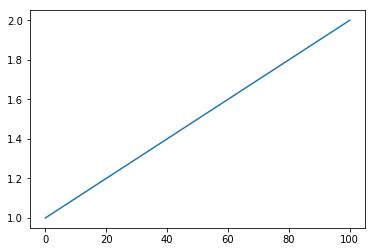

In [12]:
plt.plot(xx)

## Mean and covariance matrix
$\tilde{x}_t = A\tilde{x}_{t-1}+B\left (u_{t-1}+w_{t-1} \right) \\
\tilde{x}_t = A \left (A\tilde{x}_{t-2}+B\left (u_{t-2}+w_{t-2} \right)\right) + B\left (u_{t-1}+w_{t-1} \right) \\
...\\
\tilde{x}_t = A^t \tilde{x}_0 + \sum \limits_{i=0}^{t-1}{A^{t-1-i}B \left (u_i+w_i \right)}
$
  
We deduce the mean:
$E\left [\tilde{x}_t \right] = A^t \tilde{x}_0 + \sum \limits_{i=0}^{t-1}{A^{t-1-i}Bu_i}$ since $E\left [w_t \right] = 0$.


Then, $cov\left [\tilde{x}_t\right ] = \sum \limits_{i=0}^{t-1}{\left (A^{t-1-i}B \right )\left (A^{t-1-i}B \right )^T E\left [w_t^2 \right]} = k\sum \limits_{i=0}^{t-1}{\left (A^{t-1-i}B \right )\left (A^{t-1-i}B \right )^T u_t^2}$


  
## Minimum-variance problem
Here, the problem we consider consists in minimizing the sum of the variance of the position after reaching the target. Let $V_t$ be the top-left value in the covariance matrix at time $t$. Then, we want to minimize $\sum \limits_{t=T+1}^{T+R}V_t +bias$. 

In [13]:
def power(A, n): 
    """
    renvoie A puissance n où A est une matrice carrée
        
    """
    if n == 0:
        return(np.eye(int(np.sqrt(np.size(A)))))
    elif n == 1:
        return A
    else:
        if n % 2 == 0:
            A_half = power(A, n//2)
            return(A_half.dot(A_half))
        else:
            A_half = power(A, (n-1)//2)
            return(A.dot(A_half.dot(A_half)))

def A_pow(A):
    A_pow_array = np.zeros((T+R+1,n,n))

    for i in np.arange(T+R+1):
        A_pow_array[i] = power(A,i)
    return A_pow_array

A_pow_array = A_pow(A)

def pow_fast(n):
    return A_pow_array[n]

ci0_array = np.zeros(T+R+1)

for i in np.arange(T+R+1):
    ci0_array[i] = (pow_fast(i).dot(B))[0]

ci1_array = np.zeros(T+R+1)

for i in np.arange(T+R+1):
    ci1_array[i] = (pow_fast(i).dot(B))[1]
    
#ci2_array = np.zeros(T+R+1)

#for i in np.arange(T+R+1):
#    ci2_array[i] = (pow_fast(i).dot(B))[2]
    
#ci3_array = np.zeros(T+R+1)

#for i in np.arange(T+R+1):
#    ci3_array[i] = (pow_fast(i).dot(B))[3]

ci = np.array([ci0_array, ci1_array])#, ci2_array])

In [14]:
def expectation(u, t):
    """Computation of the expectation of the state vector at time t, given u
    """
    if t == 0:
        return x0
    else:
        return pow_fast(t).dot(x0)+(ci[:,0:t]*np.flipud(u[0:t])).sum(axis = 1)

In [15]:
mult_v = np.array([0.01, 1]) # we select the level of each parameter in the cost function
#mult_v2 = np.array([1, .0001])

In [16]:
def variance(u, t):
    """Computation of the variance of the state vector at time t, given u
    """
    return k*(np.flipud(ci0_array[0:t]**2)*u[0:t]**2).sum()#*mult_v2[0]+k*(np.flipud(ci1_array[0:t]**2)*u[0:t]**2).sum()*mult_v2[1]

In [17]:
def bias(u, t):
    """Computation of the bias of the state vector at time t, given u
    """
    return (((expectation(u, t)-(xT_f(t)))**2)*mult_v).sum()

 
This can be formulated as a quadratic programming problem, which we solved using a gradient descent.

## Gradient descent

Let $\mathscr{C}$ be the cost function to minimize.  
That is, we want to find $\textbf{u}_{\textbf{opt}} = \underset{u_0, ..., u_{T+R}}{argmin} \left (\sum \limits_{t=T+1}^{T+R}V_t  + \sum \limits_{t=T}^{T+R}\|E\left [\tilde{x}_t\right] - x_T \|^2 \right )= \underset{u_0, ..., u_{T+R}}{argmin}\left(\mathscr{C}\left (\textbf{u}\right)\right)$.



In [18]:
def cost(u):
    def var1d(t):
        return(variance(u,t))
    var_vec = np.vectorize(var1d)
    def bias1d(t):
        return(bias(u,t))
    bias_vec = np.vectorize(bias1d)
    return var_vec(T+1+np.arange(R)).sum() + bias_vec(T+np.arange(R+1)).sum()

Iterating the following process, we will get the right $\textbf{u}_{\textbf{opt}}$ :  
$\forall i \in \left \{ 0, ..., T+R-1 \right \} : u_i = u_i - \eta \times \frac{\partial \mathscr{C}\left(\textbf{u}\right)}{\partial u_i}$

In [19]:
def cost_deriv(u, i):
    """Derivative of the cost function with respect to u_i
    """
    if i < T:
        return (2*np.transpose(ci[:,(T-i-1):(T+R-i)])*np.array([((expectation(u,t)-xT_f(t))*mult_v).tolist() for t in (T+np.arange(R+1))])).sum() + 2*k*u[i]*(ci0_array[(T+1-i-1):(T+R-i)]**2).sum()
    else:
        return (2*np.transpose(ci[:,0:(T+R-i)])*np.array([((expectation(u,t)-xT_f(t))*mult_v).tolist() for t in (i+1+np.arange(R+T-i))])).sum() + 2*k*u[i]*(ci0_array[0:(T+R-i)]**2).sum()

In [20]:
niter = 10000 # 10000
eta = 6000 # 6000

In [21]:
import time

In [22]:
ubang = np.ones(T+R+1)*v/tau

In [23]:
debut = time.time()

u = ubang.copy()
a = np.zeros((niter+1, T+R+1)) # To save the evolution of the values of u at each iteration
a[0, :] = u.copy()
u_old = u.copy()


#for i_iter in np.arange(niter):
#for i_iter in range(niter):
#    u_old = u.copy()
#    u[0:T+R] = u_old[0:T+R] - eta*np.array([cost_deriv(u_old, i) for i in range(T+R)])
#    a[i_iter+1, :] = u.copy()

test = eta*np.array([cost_deriv(u_old, i) for i in np.arange(T+R)])

for i_iter in np.arange(niter):
    #u_old = u.copy()
    u[0:T+R] = u_old[0:T+R] - test
    a[i_iter+1, :] = u.copy()

fin = time.time()

In [24]:
u

array([ 771.57225157,  771.75805535,  771.95934276,  772.17740412,
        772.41363724,  772.66955645,  772.94680223,  773.24715182,
        773.57253051,  773.92502407,  774.30689207,  774.72058236,
        775.1687468 ,  775.65425822,  776.18022888,  776.75003036,
        777.36731521,  778.03604038,  778.76049253,  779.54531557,
        780.39554038,  781.31661709,  782.31444997,  783.39543536,
        784.56650258,  785.8351584 ,  787.20953514,  788.69844283,
        790.31142561,  792.05882299,  793.95183608,  796.00259939,
        798.22425862,  795.9992429 ,  793.94524964,  792.04912275,
        790.29871813,  788.6828258 ,  787.191098  ,  785.81398294,
        784.54266351,  783.36900077,  782.28548179,  781.28517149,
        780.36166818,  779.5090625 ,  778.7218996 ,  777.99514409,
        777.32414785,  776.70462017,  776.13260026,  775.60443188,
        775.11673989,  774.6664086 ,  774.25056183,  773.86654444,
        773.51190534,  773.18438174,  772.88188468,  772.60248

In [25]:
(fin-debut)*100/60/60

0.009366055329640707

Then, we draw $\text{u}$, that is, the evolution of the control signal during the experiment.

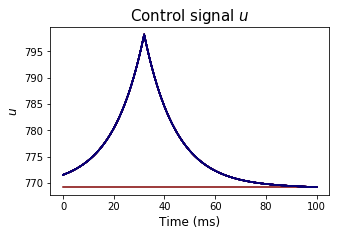

In [26]:
plot_signal(a, 500, 10000, t_T, t_R, 0.001)
#plot_signal(a, 50, 1000, t_T, t_R, 0.001)

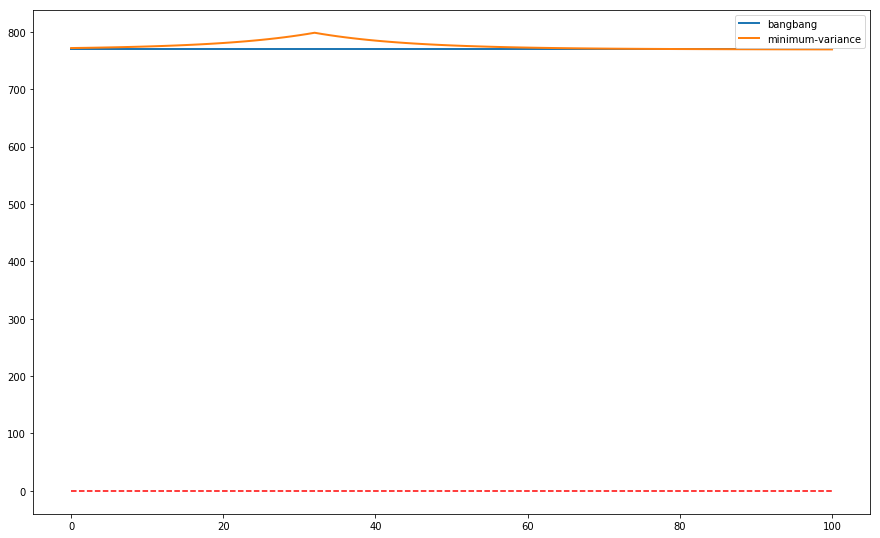

In [27]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(time_ms, a[0], lw=2, label="bangbang")
ax.plot(time_ms, a[niter], lw=2, label="minimum-variance")
ax.plot([0,(t_T+t_R)*1000],[0,0],'r--')
ax.legend()

In [28]:
position = np.zeros((niter+1,T+R+1))
velocity = np.zeros((niter+1,T+R+1))

for i in np.arange(niter+1):
    for j in np.arange(T+R+1):
        mean = expectation(a[i,:], j)
        position[i,j] = mean[0]
        velocity[i,j] = mean[1]

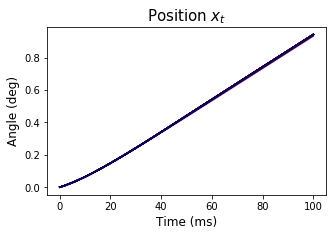

In [29]:
plot_position(position, 500, 10000, t_T, t_R, 0.001)
#plot_position(position, 5, 100, t_T, t_R, 0.001)


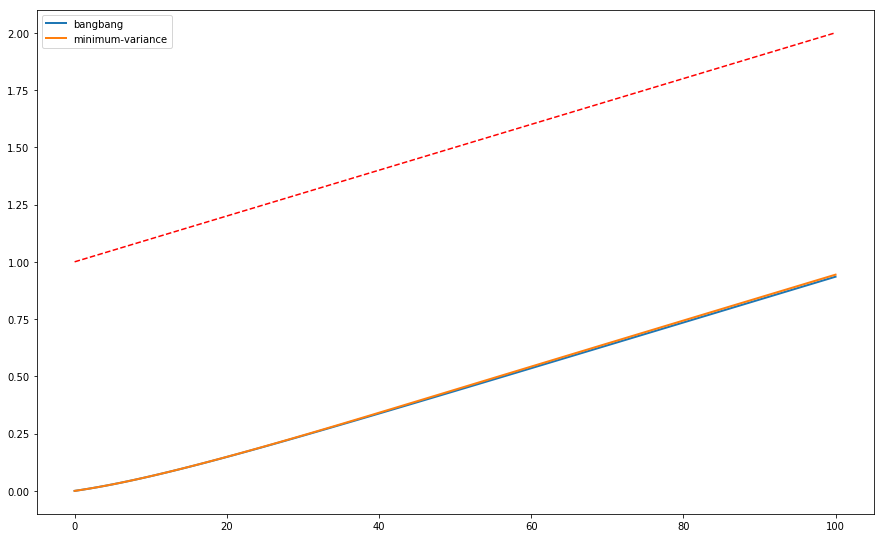

In [30]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(time_ms, position[0], lw=2, label="bangbang")
ax.plot(time_ms, position[niter], lw=2, label="minimum-variance")
ax.plot(np.linspace(0,(t_T+t_R)*1000,T+R+1), xx,'r--')

ax.legend()


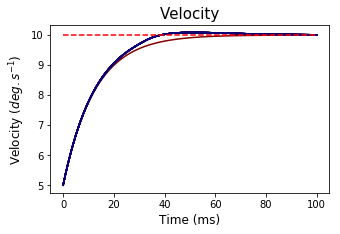

In [31]:
plot_velocity(velocity, 500, 10000, t_T, t_R, 0.001)
#plot_velocity(velocity, 5, 100, t_T, t_R, 0.001)

plt.plot(time_ms, vv,'r--')

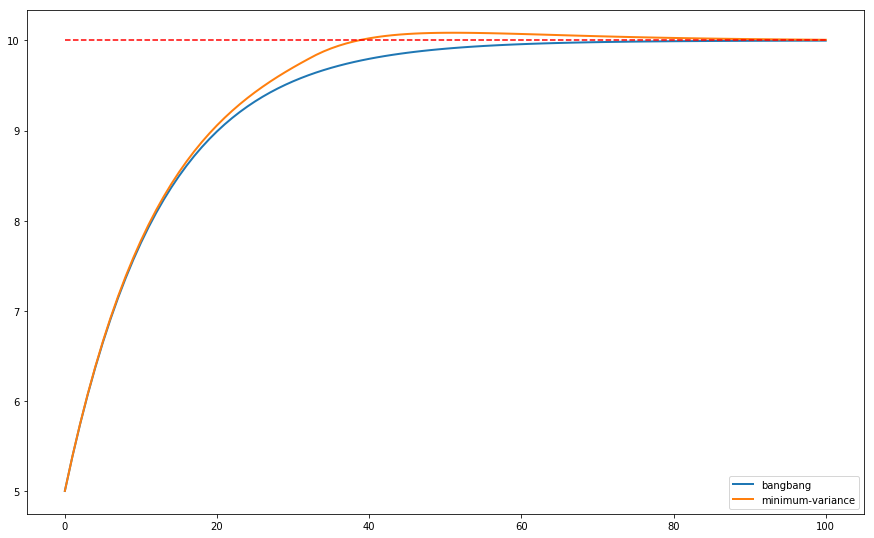

In [32]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(time_ms, velocity[0], lw=2, label="bangbang")
ax.plot(time_ms, velocity[niter], lw=2, label="minimum-variance")
ax.plot(np.linspace(0,(t_T+t_R)*1000,T+R+1), vv,'r--')
ax.legend()

In [33]:
variancev = np.zeros((niter+1,T+R+1))

for i in np.arange(niter+1):
    for j in np.arange(T+R+1):
        variancev[i,j] = variance(a[i,:], j)

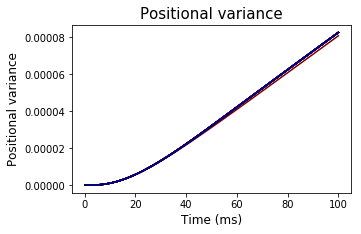

In [40]:
plot_variance(variancev, 250, 5000, t_T, t_R, 0.001)
#plot_variance(variancev, 25, 500, t_T, t_R, 0.001)

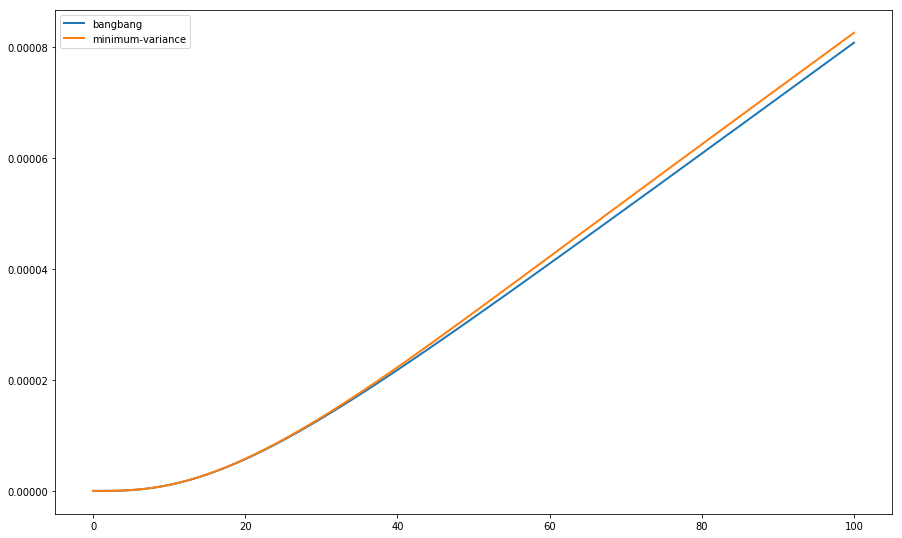

In [41]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(time_ms, variancev[0], lw=2, label="bangbang")
ax.plot(time_ms, variancev[niter], lw=2, label="minimum-variance")
ax.legend()

In [42]:
vel = np.zeros((8,T+R+1))

In [43]:
pos = np.zeros((8,T+R+1))

In [44]:
vel[7,:] = velocity[niter]

In [45]:
pos[7,:] = position[niter]

NameError: name 'record_position' is not defined

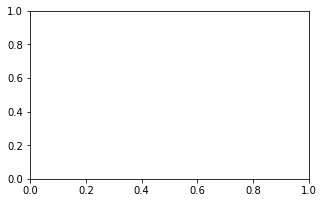

In [46]:
#all_plots(record, bang_data, record_each, n_iter, t_T, t_R, dt, xT, v)

col = np.zeros((8,3))
for i in np.arange(8):
    col[i] = (8-i)/(2*8),0,i/(2*8)

fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record_position[0],np.ones(100)*record_position[0][T+R])), color = col[0], lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record_position[1],np.ones(100)*record_position[1][T+R])), color = col[1], lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record_position[2],np.ones(100)*record_position[2][T+R])), color = col[2], lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record_position[3],np.ones(100)*record_position[3][T+R])), color = col[3], lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record_position[4],np.ones(100)*record_position[4][T+R])), color = col[4], lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record_position[5],np.ones(100)*record_position[5][T+R])), color = col[5], lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record_position[6],np.ones(100)*record_position[6][T+R])), color = col[6], lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record_position[7],np.ones(100)*record_position[7][T+R])), color = col[7], lw = 2)
#ax.plot(np.linspace(0,2*(t_T+t_R)*1000,2*T+2*R+1), np.ones(2*T+2*R+1)*target[0],'r--')
#ax.plot(np.linspace(0,2*(t_T+t_R)*1000,2*T+2*R+1), np.ones(2*T+2*R+1)*target[1],'r--')
#ax.plot(np.linspace(0,2*(t_T+t_R)*1000,2*T+2*R+1), np.ones(2*T+2*R+1)*target[2],'r--')
#ax.plot(np.linspace(0,2*(t_T+t_R)*1000,2*T+2*R+1), np.ones(2*T+2*R+1)*target[3],'r--')
#ax.plot(np.linspace(0,2*(t_T+t_R)*1000,2*T+2*R+1), np.ones(2*T+2*R+1)*target[4],'r--')
#ax.plot(np.linspace(0,2*(t_T+t_R)*1000,2*T+2*R+1), np.ones(2*T+2*R+1)*target[5],'r--')
#ax.plot(np.linspace(0,2*(t_T+t_R)*1000,2*T+2*R+1), np.ones(2*T+2*R+1)*target[6],'r--')
#ax.plot(np.linspace(0,2*(t_T+t_R)*1000,2*T+2*R+1), np.ones(2*T+2*R+1)*target[7],'r--')
plt.text(170, 2.5, r'$x_T = 5$', fontsize = 10)
plt.text(170, 7.5, r'$x_T = 10$', fontsize = 10)
plt.text(170, 12.5, r'$x_T = 15$', fontsize = 10)
plt.text(170, 17.5, r'$x_T = 20$', fontsize = 10)
plt.text(170, 22.5, r'$x_T = 25$', fontsize = 10)
plt.text(170, 27.5, r'$x_T = 30$', fontsize = 10)
plt.text(170, 32.5, r'$x_T = 35$', fontsize = 10)
plt.text(170, 37.5, r'$x_T = 40$', fontsize = 10)


ax.set_ylim(-0.5, target[7]+0.5)

ax.set_title(r'Evolution of the position for different amplitudes $x_T$', fontsize = 10)
ax.set_xlabel('Time ($ms$)', fontsize=10)
ax.set_ylabel(r'Position ($deg$)', fontsize=10)
plt.savefig('diffamplitudepos.png')

In [ ]:
col = np.zeros((8,3))
for i in np.arange(8):
    col[i] = (8-i)/(2*8),0,i/(2*8)

fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.velocity[0],np.zeros(100))), color = col[0], label= r'$x_T = 5$', lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.velocity[1],np.zeros(100))), color = col[1], label= r'$x_T = 10$', lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.velocity[2],np.zeros(100))), color = col[2], label= r'$x_T = 15$', lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.velocity[3],np.zeros(100))), color = col[3], label= r'$x_T = 20$', lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.velocity[4],np.zeros(100))), color = col[4], label= r'$x_T = 25$', lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.velocity[5],np.zeros(100))), color = col[5], label= r'$x_T = 30$', lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.velocity[6],np.zeros(100))), color = col[6], label= r'$x_T = 35$', lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.velocity[7],np.zeros(100))), color = col[7], label= r'$x_T = 40$', lw = 2)

ax.legend(prop={'size':8})


ax.set_ylim(-20, 600)

ax.set_title(r'Evolution of the velocity for different amplitudes $x_T$', fontsize = 10)
ax.set_xlabel('Time ($ms$)', fontsize=10)
ax.set_ylabel(r'Velocity ($deg\cdot s^{-1}$)', fontsize=10)



In [ ]:
peak_vel = np.array([max(record.velocity[0]),max(record.velocity[1]),max(record.velocity[2]),max(record.velocity[3]),max(record.velocity[4]),max(record.velocity[5]),max(record.velocity[6]),max(record.velocity[7])])

In [ ]:
alpha = (np.sqrt(np.concatenate((np.zeros(1),target)))*np.concatenate((np.zeros(1),peak_vel))).sum()/((np.concatenate((np.zeros(1),target))).sum())

In [ ]:
fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
plt.plot(np.concatenate((np.zeros(1),target)), np.concatenate((np.zeros(1),peak_vel)),lw = 2)
ax.set_ylim(-20, 600)

ax.set_title('Main sequence diagram', fontsize = 12)
ax.set_xlabel('Amplitude ($deg$)', fontsize=10)
ax.set_ylabel(r'Peak velocity ($deg\cdot s^{-1}$)', fontsize=10)

In [ ]:
alpha

In [ ]:
cost_p = np.zeros(niter+1)

for i in np.arange(niter+1):
    cost_p[i] = cost(a[i])

In [ ]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(cost_p, '-', lw = 2)
ax.set_title('Cost')
ax.set_xlabel('Number of iterations', fontsize=14)
ax.set_ylabel('Cost', fontsize=14)


Finally, we trace the position at time T for each iteration.

In [ ]:
positionT = np.zeros(niter+1)

for i in np.arange(niter+1):
    positionT[i] = (expectation(a[i], T))[0]

In [ ]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(positionT, '-', lw=2)
ax.set_title('Position at time T')
ax.set_xlabel('Number of iterations', fontsize=14)
ax.set_ylabel('Position (deg)', fontsize=14)
ax.plot([0,niter],[xT[0]+v*t_T ,xT[0]+v*t_T],'r--')


In [ ]:
import pickle
import pandas as pd
record = pd.DataFrame()
for i in np.arange(8):
    record_one = pd.DataFrame([{'position':pos[i,:],'velocity':vel[i,:]}],index=[i])
    record = pd.concat([record, record_one])
record.to_pickle('../2017_OptimalPrecision/DataRecording/'+'HarrisWolpertPursuit_dt=0.001_tau=0.013_data_for_main_sequence.pkl')

In [ ]:
import pickle
import pandas as pd
record = pd.read_pickle('/home/baptiste/Documents/2017_OptimalPrecision/DataRecording/'+'HarrisWolpertPursuit_dt=0.002_beta=100_m=1_cosinus.pkl')

In [ ]:
len(record_velocity[500])

In [ ]:
plot_signal(record_signal, 500, 10000, 0.1, 1.9, 0.002)

In [ ]:
plot_position(record_position, 500, 10000, 0.1, 1.9, 0.002)


In [ ]:
plot_velocity(record_velocity, 500, 10000, 0.1, 1.9, 0.002)
